In [13]:
import pandas as pd
df = pd.read_csv('d:/data/project/project_GDP.csv', header=0, index_col=0,encoding='CP949', squeeze=True)


C:\Users\tjoeun707\AppData\Local\Temp\ipykernel_12048\3398446725.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('d:/data/project/project_GDP.csv', header=0, index_col=0,encoding='CP949', squeeze=True)


In [14]:
df_check = df.isnull()
print(df_check.head()) #NAN체크 있으면 true 없으면 False
check_for_nan = df.isnull().sum().sum()
print('NAN개수:'+str(check_for_nan))#NAN 개수확인

        아시아     한국   이스라엘     일본     터키  북아메리카    캐나다    멕시코     미국  남아메리카  \
시점                                                                           
1959  False  False  False  False  False  False  False  False  False  False   
1960  False  False  False  False  False  False  False  False  False  False   
1961  False  False  False  False  False  False  False  False  False  False   
1962  False  False  False  False  False  False  False  False  False  False   
1963  False  False  False  False  False  False  False  False  False  False   

      ...  슬로바키아  슬로베니아    스페인    스웨덴    스위스     영국  오세아니아  오스트레일리아   뉴질랜드  \
시점    ...                                                                    
1959  ...  False  False  False  False  False  False  False    False  False   
1960  ...   True   True  False  False  False  False  False    False  False   
1961  ...   True   True  False  False  False  False  False    False  False   
1962  ...   True   True  False  False  False  False  False    F

In [15]:
df =df.interpolate()

In [16]:
df

,아시아,한국,이스라엘,일본,터키,북아메리카,캐나다,멕시코,미국,남아메리카,...,슬로바키아,슬로베니아,스페인,스웨덴,스위스,영국,오세아니아,오스트레일리아,뉴질랜드,세계
시점,,,,,,,,,,,,,,,,,,,,,
1959,0.000000,0,0.0,0.0,0,0.000000,0,0,0,0.000000,...,0.000000,0.000000,0,0,0.0,0,0.0,0,0.0,0.000000
1960,764.000000,79,1229.0,475.0,509,1870.333333,2259,345,3007,379.000000,...,77.612903,298.055556,396,2114,1787.0,1398,2060.5,1808,2313.0,1155.181481
1961,791.000000,84,1436.0,569.0,284,1890.000000,2240,363,3067,394.666667,...,155.225806,596.111111,450,2289,1971.0,1472,2109.0,1875,2343.0,1187.140741
1962,711.333333,90,1095.0,640.0,309,1963.666667,2269,378,3244,421.000000,...,232.838710,894.166667,520,2469,2131.0,1526,2150.5,1852,2449.0,1210.462963
1963,812.333333,103,1258.0,725.0,351,2052.666667,2374,409,3375,424.333333,...,310.451613,1192.222222,609,2657,2294.0,1613,2293.0,1964,2622.0,1291.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,38742.333330,29287,37283.0,38762.0,10895,36360.666670,42316,8745,58021,10545.333330,...,16509.000000,21664.000000,26505,51965,83073.0,41048,45025.5,49971,40080.0,34858.144440
2017,40352.333330,31605,40475.0,38387.0,10590,38175.666670,45129,9288,60110,11200.666670,...,17504.000000,23455.000000,28101,53792,83352.0,40305,48510.5,54028,42993.0,36865.314810
2018,41248.666670,33429,41705.0,39159.0,9453,39735.333330,46455,9687,63064,11695.666670,...,19365.000000,26103.000000,30375,54589,86430.0,42993,50330.5,57355,43306.0,38521.188890


<AxesSubplot:xlabel='시점'>

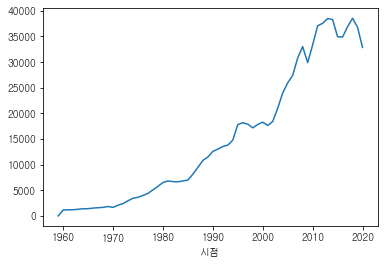

In [17]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
df['세계'].plot()

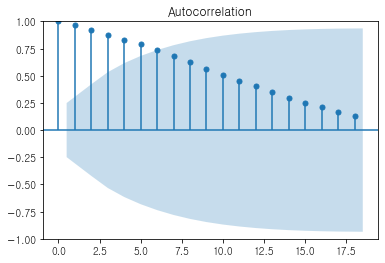

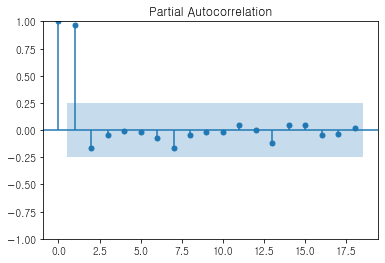

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['세계'])
plot_pacf(df['세계'], method='ywm')
plt.show()

In [21]:
from pmdarima.arima import auto_arima
model=auto_arima(df['세계'],suppress_warnings=True)
model

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (d:\anaconda\lib\site-packages\scipy\signal\signaltools.py)

In [ ]:
n=int(df.shape[0]*.8)
train=df[:n]
test=df[n:]

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.arima.ARIMA(df['세계'], order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
plt.figure(figsize=(25, 20))
plt.subplot(321)
plt.plot(df.iloc[:,0:5])
plt.title('아시아')
plt.legend(df.iloc[:,0:5])
plt.subplot(322)
plt.plot(df.iloc[:,5:9])
plt.title('북아메리카')
plt.legend(df.iloc[:,5:9])
plt.subplot(323)
plt.plot(df.iloc[:,9:13])
plt.title('남아메리카')
plt.legend(df.iloc[:,9:13])
plt.subplot(324)
plt.plot(df.iloc[:,13:-3])
plt.title('유럽')
plt.legend(df.iloc[:,13:-3])
plt.subplot(325)
plt.plot(df.iloc[:,-3:])
plt.title('오세아니아')
plt.legend(df.iloc[:,-3:])

In [ ]:
#차분후
diff_1=df.diff(periods=1).iloc[1:]
plot_acf(diff_1['세계'])
plot_pacf(diff_1['세계'],method='ywm')
plt.show()

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
diff_1['세계'].plot()

In [ ]:
from pmdarima.arima import auto_arima
model_d=auto_arima(diff_1['세계'],suppress_warnings=True)
model_d 

In [ ]:
n_d=int(diff_1.shape[0]*.8)
train_d=diff_1[:n]
test_d=diff_1[n:]

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model_d = sm.tsa.arima.ARIMA(diff_1['세계'], order=(2,1,3))
model_fit_d = model_d.fit()
print(model_fit_d.summary())


In [ ]:
model.plot_diagnostics(figsize =(16,8))
plt.show()

In [ ]:
plt.figure(figsize=(25, 20))
plt.subplot(321)
plt.plot(diff_1.iloc[:,0:5])
plt.title('아시아')
plt.legend(diff_1.iloc[:,0:5])
plt.subplot(322)
plt.plot(diff_1.iloc[:,5:9])
plt.title('북아메리카')
plt.legend(diff_1.iloc[:,5:9])
plt.subplot(323)
plt.plot(diff_1.iloc[:,9:13])
plt.title('남아메리카')
plt.legend(diff_1.iloc[:,9:13])
plt.subplot(324)
plt.plot(diff_1.iloc[:,13:-3])
plt.title('유럽')
plt.legend(diff_1.iloc[:,13:-3])
plt.subplot(325)
plt.plot(diff_1.iloc[:,-3:])
plt.title('오세아니아')
plt.legend(diff_1.iloc[:,-3:])

In [ ]:
from statsmodels.tsa.stattools import adfuller 
import numpy as np 
diff1=np.log(df['아이슬란드']).diff(periods=1).iloc[2:]
result=adfuller(diff1)
print(result[1])

In [ ]:
fore=model.forecast(steps=5)
print(fore)

In [ ]:

model.plot_predict()
plt.show()

In [ ]:
fc,se,conf=model.forecast(steps=len(test))
fc_series=pd.Series(fc,index=test.index)
lower=pd.Series(conf[:,0],index=test.index)
upper=pd.Series(conf[:,1],index=test.index)
plt.plot(df['세계'],label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=0.15)
plt.title('forecast vs actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()